In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [35]:
data = pd.read_csv('TSdata.csv')

In [36]:
data.head()

,time(min),1st component,2nd component,ph,COD removal% (OUTPUT)
0,30,0.0,5.0,3,33.00
1,30,0.0,10.0,3,25.00
2,30,0.0,15.0,3,33.33
3,30,0.0,20.0,3,33.33
4,30,0.0,25.0,3,33.33


In [37]:
data.columns=['time','c1','c2','ph','output']
from sklearn.preprocessing import LabelEncoder
data.head()

,time,c1,c2,ph,output
0,30,0.0,5.0,3,33.00
1,30,0.0,10.0,3,25.00
2,30,0.0,15.0,3,33.33
3,30,0.0,20.0,3,33.33
4,30,0.0,25.0,3,33.33


In [38]:
data['ph'] = data['ph'].astype(float)
data['H+'] = 10 ** -data['ph']
data

,time,c1,c2,ph,output,H+
0,30,0.0,5.0,3.0,33.00,1.000000e-03
1,30,0.0,10.0,3.0,25.00,1.000000e-03
2,30,0.0,15.0,3.0,33.33,1.000000e-03
3,30,0.0,20.0,3.0,33.33,1.000000e-03
4,30,0.0,25.0,3.0,33.33,1.000000e-03
...,...,...,...,...,...,...
444,180,1.0,4.0,9.0,50.00,1.000000e-09
445,180,2.0,8.0,9.0,50.00,1.000000e-09
446,180,3.0,12.0,9.0,75.00,1.000000e-09
447,180,4.0,16.0,9.0,75.00,1.000000e-09


In [39]:
data['output_diff']=data['output']-data['output'].shift(+1)
data.iloc[0,-1]=1
data

,time,c1,c2,ph,output,H+,output_diff
0,30,0.0,5.0,3.0,33.00,1.000000e-03,1.00
1,30,0.0,10.0,3.0,25.00,1.000000e-03,-8.00
2,30,0.0,15.0,3.0,33.33,1.000000e-03,8.33
3,30,0.0,20.0,3.0,33.33,1.000000e-03,0.00
4,30,0.0,25.0,3.0,33.33,1.000000e-03,0.00
...,...,...,...,...,...,...,...
444,180,1.0,4.0,9.0,50.00,1.000000e-09,-16.66
445,180,2.0,8.0,9.0,50.00,1.000000e-09,0.00
446,180,3.0,12.0,9.0,75.00,1.000000e-09,25.00
447,180,4.0,16.0,9.0,75.00,1.000000e-09,0.00


In [40]:
data['output_diff'].describe()

count    449.000000
mean       0.002962
std       26.718475
min     -100.000000
25%      -17.000000
50%        0.000000
75%       25.000000
max      100.000000
Name: output_diff, dtype: float64

In [41]:
data['output'].describe()

count    449.000000
mean      45.711269
std       19.577418
min        0.000000
25%       33.000000
50%       50.000000
75%       50.000000
max      100.000000
Name: output, dtype: float64

In [42]:
datacolumns=['time','c1','c2','ph','H+','output_diff','output']
data=data.loc[:,datacolumns]
data

,time,c1,c2,ph,H+,output_diff,output
0,30,0.0,5.0,3.0,1.000000e-03,1.00,33.00
1,30,0.0,10.0,3.0,1.000000e-03,-8.00,25.00
2,30,0.0,15.0,3.0,1.000000e-03,8.33,33.33
3,30,0.0,20.0,3.0,1.000000e-03,0.00,33.33
4,30,0.0,25.0,3.0,1.000000e-03,0.00,33.33
...,...,...,...,...,...,...,...
444,180,1.0,4.0,9.0,1.000000e-09,-16.66,50.00
445,180,2.0,8.0,9.0,1.000000e-09,0.00,50.00
446,180,3.0,12.0,9.0,1.000000e-09,25.00,75.00
447,180,4.0,16.0,9.0,1.000000e-09,0.00,75.00


In [43]:
from scipy.interpolate import interp1d
data.sort_values('time', inplace=True)

num_extrapolated_points = 100
extrapolated_arr = np.empty(shape=(100,7))

for index,column in enumerate(['c1', 'c2', 'ph', 'H+','output_diff','output']):
    x = data['time']
    y = data[column]
    interp_func = interp1d(x, y, kind='linear', bounds_error=False)
    extrapolated_time = np.linspace(x.min(), x.max(), num_extrapolated_points)
    extrapolated_values = interp_func(extrapolated_time)
    extrapolated_arr[:,index]=extrapolated_values
print(data.tail())

     time   c1    c2   ph            H+  output_diff  output
396   180  0.0  10.0  9.0  1.000000e-09         0.00   25.00
395   180  0.0   5.0  9.0  1.000000e-09        -8.00   25.00
394   180  0.0  25.0  8.0  1.000000e-08        -0.33   33.00
391   180  0.0  10.0  8.0  1.000000e-08       -25.00   50.00
448   180  5.0  20.0  9.0  1.000000e-09       -41.67   33.33


In [44]:
extrapolated_arr=pd.DataFrame(extrapolated_arr)
extrapolated_arr

,0,1,2,3,4,5,6
0,1.500000,13.500000,3.0,1.000000e-03,50.000000,50.000000,2.964394e-323
1,1.474747,13.020202,3.0,1.000000e-03,46.633333,50.000000,6.940624e-310
2,1.449495,12.540404,3.0,1.000000e-03,43.266667,50.000000,6.940624e-310
3,1.424242,12.060606,3.0,1.000000e-03,39.900000,50.000000,0.000000e+00
4,1.398990,11.580808,3.0,1.000000e-03,36.533333,50.000000,2.121996e-314
...,...,...,...,...,...,...,...
95,3.494949,15.494949,3.0,1.000000e-03,16.515152,66.515152,1.633937e-312
96,3.621212,15.621212,3.0,1.000000e-03,18.636364,68.636364,0.000000e+00
97,3.747475,15.747475,3.0,1.000000e-03,20.757576,70.757576,2.334195e-313
98,3.873737,15.873737,3.0,1.000000e-03,22.878788,72.878788,2.758595e-313


In [45]:
extrapolated_arr.dropna()

,0,1,2,3,4,5,6
0,1.500000,13.500000,3.0,1.000000e-03,50.000000,50.000000,2.964394e-323
1,1.474747,13.020202,3.0,1.000000e-03,46.633333,50.000000,6.940624e-310
2,1.449495,12.540404,3.0,1.000000e-03,43.266667,50.000000,6.940624e-310
3,1.424242,12.060606,3.0,1.000000e-03,39.900000,50.000000,0.000000e+00
4,1.398990,11.580808,3.0,1.000000e-03,36.533333,50.000000,2.121996e-314
...,...,...,...,...,...,...,...
95,3.494949,15.494949,3.0,1.000000e-03,16.515152,66.515152,1.633937e-312
96,3.621212,15.621212,3.0,1.000000e-03,18.636364,68.636364,0.000000e+00
97,3.747475,15.747475,3.0,1.000000e-03,20.757576,70.757576,2.334195e-313
98,3.873737,15.873737,3.0,1.000000e-03,22.878788,72.878788,2.758595e-313


In [46]:
data = pd.DataFrame(np.vstack((np.array(data),np.array(extrapolated_arr))))

In [47]:
data.iloc[:,-1].max()

100.0

In [48]:
data.shape

(549, 7)

In [49]:
data.dropna()

,0,1,2,3,4,5,6
0,30.000000,0.000000,5.0,3.000000e+00,0.001000,1.000000,3.300000e+01
1,30.000000,5.000000,20.0,3.000000e+00,0.001000,-8.000000,2.500000e+01
2,30.000000,4.000000,16.0,3.000000e+00,0.001000,0.000000,3.300000e+01
3,30.000000,3.000000,12.0,3.000000e+00,0.001000,-42.000000,3.300000e+01
4,30.000000,2.000000,8.0,3.000000e+00,0.001000,25.000000,7.500000e+01
...,...,...,...,...,...,...,...
544,3.494949,15.494949,3.0,1.000000e-03,16.515152,66.515152,1.633937e-312
545,3.621212,15.621212,3.0,1.000000e-03,18.636364,68.636364,0.000000e+00
546,3.747475,15.747475,3.0,1.000000e-03,20.757576,70.757576,2.334195e-313
547,3.873737,15.873737,3.0,1.000000e-03,22.878788,72.878788,2.758595e-313


In [50]:
data.shape

(549, 7)

In [51]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values 

In [52]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,30.0,0.0,5.0,3.0,0.001,1.0
1,30.0,5.0,20.0,3.0,0.001,-8.0
2,30.0,4.0,16.0,3.0,0.001,0.0
3,30.0,3.0,12.0,3.0,0.001,-42.0
4,30.0,2.0,8.0,3.0,0.001,25.0


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(X)
X = model.transform(X)
X=pd.DataFrame(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=6)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=300)
model.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=300)

In [57]:
from sklearn.metrics import r2_score

In [58]:
y_pred = model.predict(X_test)

<AxesSubplot: >

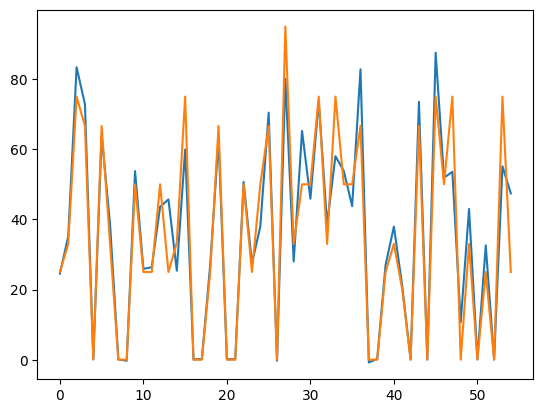

In [59]:
pd.Series(y_pred).plot(label='prediction')
pd.Series(y_test).plot(label='actual value')

In [60]:
score = r2_score(y_test,y_pred)
print(f"Model score: {score}")

Model score: 0.9029467367105158


In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,y_pred))
rmse

8.645344170396385

In [62]:
result = pd.DataFrame({'actual':y_test,'prediction':y_pred})
result.to_csv('result.csv',index=False)